# pandasによる可視化

* `pandas.Series.plot` メソッドまたは `pandas.DataFrame.plot` メソッドからデータを可視化できます。
* 簡素な記法で記述できるのでお薦めです。
* 実際にはMatplotlibで描画しています。（pandasでMatplotlibをラップしている）

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

乱数でデータを作成

In [2]:
np.random.seed(2)
df = pd.DataFrame(np.random.randn(100, 4), columns=list("ABCD"))

In [3]:
df.head()

,A,B,C,D
0,-0.416758,-0.056267,-2.136196,1.640271
1,-1.793436,-0.841747,0.502881,-1.245288
2,-1.057952,-0.909008,0.551454,2.292208
3,0.041539,-1.117925,0.539058,-0.596160
4,-0.019130,1.175001,-0.747871,0.009025


## 基本的なグラフ

### 線グラフ

<AxesSubplot:>

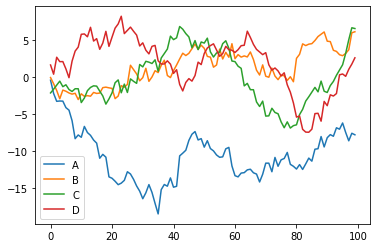

In [4]:
df.cumsum().plot()

### 散布図

<AxesSubplot:xlabel='A', ylabel='B'>

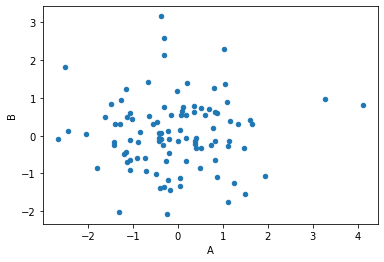

In [5]:
df.plot.scatter(x="A", y="B")

### 棒グラフ

<AxesSubplot:>

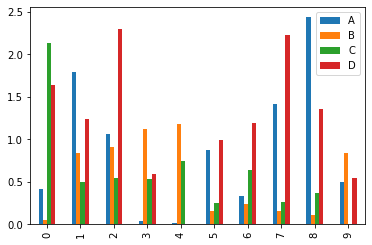

In [6]:
df.iloc[:10].applymap(abs).plot.bar()

<AxesSubplot:>

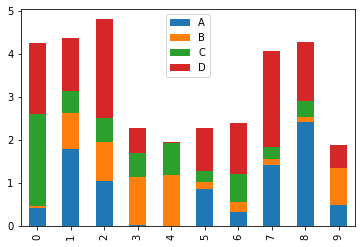

In [7]:
df.iloc[:10].applymap(abs).plot.bar(stacked=True)

### ヒストグラム

<AxesSubplot:ylabel='Frequency'>

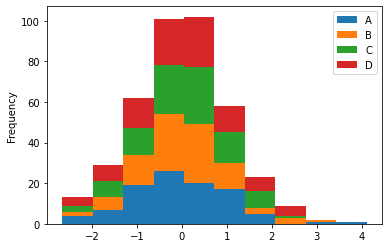

In [8]:
df.plot.hist(stacked=True)

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

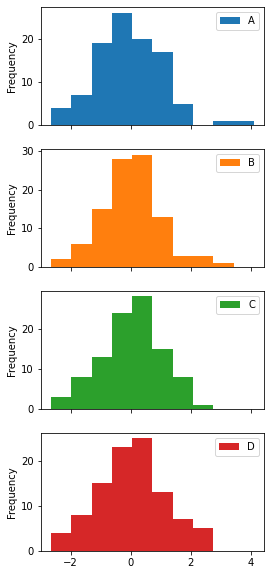

In [9]:
df.plot.hist(subplots=True, figsize=(4, 10))

## 複数のグラフ

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

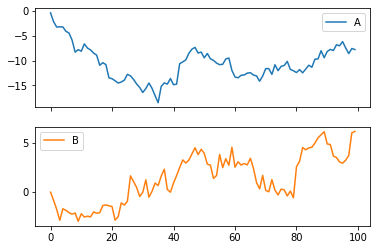

In [10]:
df[["A", "B"]].cumsum().plot(subplots=True)

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

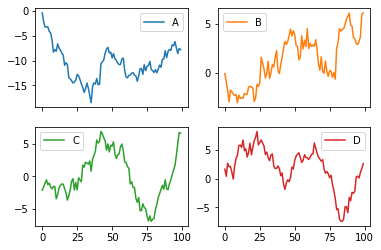

In [11]:
df.cumsum().plot(subplots=True, layout=(2, 2))

## 書式の指定

まずは日本語フォントの設定をします。

Google Colabなどの場合は以下をインストールすることで対応できます。

In [12]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 10.5 MB/s eta 0:00:01
Using legacy 'setup.py install' for japanize-matplotlib, since package 'wheel' is not installed.
    Running setup.py install for japanize-matplotlib ... done
You should consider upgrading via the '/home/terapyon/dev/edu/hit-u/hit-u-ds-course/venv/bin/python3 -m pip install --upgrade pip' command.


In [13]:
import japanize_matplotlib
japanize_matplotlib.japanize()

Jupyter labをローカルで使っている人向けの設定サンプルは以下となります。
フォントがPCに入っていないななどエラーになる可能性はあります。

In [14]:
import matplotlib.pyplot as plt
# 日本語フォントの設定
plt.rcParams["font.sans-serif"] = [
    "Hiragino Maru Gothic Pro",
    "Yu Gothic",
    "Meirio",
    "Takao",
    "IPAexGothic",
    "IPAPGothic",
    "VL PGothic",
    "Noto Sans CJK JP",
]

<AxesSubplot:title={'center':'グラフのタイトル'}>

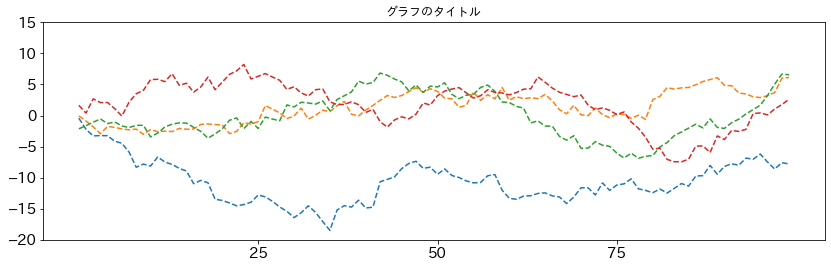

In [15]:
df.cumsum().plot(
    figsize=(14, 4),  # グラフのサイズ
    title="グラフのタイトル",  # タイトル
    legend=False,  # 凡例を非表示
    style="--",  # グラフ要素の書式
    xticks=[25, 50, 75],  # X軸の目盛指定
    ylim=[-20, 15],  # Y軸の範囲指定
    fontsize=15,  # 軸ラベルのフォントサイズ
)